# Importing libraries and dataset

In [2]:
# code to ensure that any changes made to the functions.py file are reflected in the Jupyter Notebook upon import
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from functions import cleaning 

In [4]:
# Disabling a specific type of warning from Jupyter, that I know if mistaken for something else
pd.options.mode.chained_assignment = None 

**Dataset**:

Chen,Daqing. (2015). Online Retail. UCI Machine Learning Repository. https://doi.org/10.24432/C5BW33.

In [5]:
file_path = '../data/Online Retail.xlsx'
df = pd.read_excel(file_path)

# Initial Exploration

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Missing values

**Notes for cleaning:**

- To drop rows with NaN at Description AND at CustomerID
- Drop rows with Price 0.0

**Then I will be left with NaN at CustomerID -> 132605 NaN values**

In [8]:
#  Missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df.loc[df.Description.isna()] # 1454 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [10]:
df[df.Description.isna() & df.CustomerID.isna()] # 1454 row

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [11]:
df[df.UnitPrice == 0.0] # will drop these rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


## Duplicated values

**Notes for cleaning:**

- Drop duplicated rows

In [12]:
df.duplicated().sum() # Duplicated rows

5268

## Dtypes

Types of columns appear to be correct.

In [13]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

## Outliers & Negative values

**Notes for cleaning:**

- There seem to be outliers in columns 'Quantity' and 'UnitPrice'. To check them and if appropriate to remove them with statistical methods (?)

**Notes:**

- Something weird with UnitPrice '-11062.06', bad debt
- Stockcode with 1 word ['M', 'D', 'S', 'B', 'm']
- if InvoiceNo code starts with letter 'c', it indicates a cancellation - TO BE DROPPED



*TO BE EXPLORED outliers at Quantity and Unit Price*

<Axes: ylabel='Quantity'>

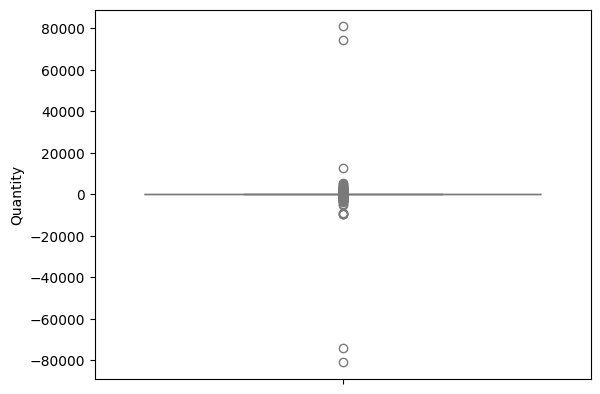

In [14]:
sns.boxplot(data = df['Quantity'], color="lightblue") # there are outliers

<Axes: ylabel='UnitPrice'>

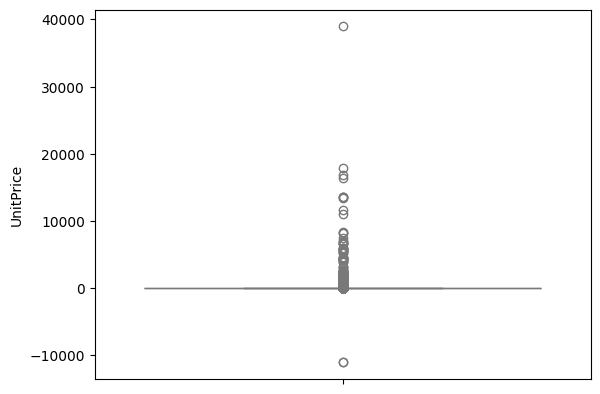

In [15]:
sns.boxplot(data = df['UnitPrice'], color="lightblue") # there are outliers

In [16]:
# These are tthe two values that are more weird
df.sort_values(by='Quantity', ascending=False).head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom


In [17]:
df.select_dtypes('number').describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [18]:
df[df.InvoiceNo == 567507].UnitPrice.sum()

2192.5100000000007

In [19]:
df[(df.InvoiceNo == 567507) & (df.StockCode =='SHIPPING')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [20]:
# it looks that th 60 top unit prices are either Shipping or NaN
# I will drop the NaN (they are from the MANUAL code) because they don't offer any clear insights
df.sort_values(by='UnitPrice', ascending=False).head(40)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:35:00,11586.50,NaN,United Kingdom
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom


In [21]:
df.sort_values(by='Quantity', ascending=False).head(40)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
74614,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,NaN,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.00,NaN,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom


In [22]:
# I see that there are also the shipping costs with SrockCode 'POST' and 'DOT'
df[df.Description.str.contains('POSTAGE', na=False)].head(30)
# For clarity I will replace the code and description with shipping

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.00,12738.0,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.00,12686.0,France
5325,536858,POST,POSTAGE,2,2010-12-03 10:36:00,40.00,13520.0,Switzerland
5369,536861,POST,POSTAGE,3,2010-12-03 10:44:00,18.00,12427.0,Germany
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom


In [23]:
df[df.Description.str.contains('POSTAGE', na=False)].StockCode.value_counts()

StockCode
POST    1252
DOT      709
Name: count, dtype: int64

In [24]:
# There are two entries with amazon fee, and these invoices contain only that item
# Will drop them 
df[df.Description.str.contains('AMAZON', na=False)].head(30)
# df[df.InvoiceNo == 537632]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14514,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
16357,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
96844,C544587,AMAZONFEE,AMAZON FEE,-1,2011-02-21 15:07:00,5575.28,NaN,United Kingdom


In [25]:
df[(df.Quantity<0)] # 10624 rows, THESE ARE CANCELLATIONS

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [26]:
df[(df.Quantity<0) & df.InvoiceNo.str.startswith('C')] # cancellations

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [27]:
df[(df.Quantity<0) & (~df.InvoiceNo.astype(str).str.startswith('C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [28]:
df[(df.Quantity<0) & (~df.InvoiceNo.astype(str).str.startswith('C'))].Quantity.describe()
# I see from this, that what has the above conditions, has negative Quantity

count    1336.000000
mean     -154.907934
std       588.292456
min     -9600.000000
25%       -84.000000
50%       -30.000000
75%        -8.000000
max        -1.000000
Name: Quantity, dtype: float64

In [29]:
df[df.InvoiceNo == '581568']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [30]:
df[df.CustomerID == 17548.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,2011-04-20 12:01:00,1.25,17548.0,United Kingdom
165025,550755,22082,RIBBON REEL STRIPES DESIGN,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom
165026,550755,22081,RIBBON REEL FLORA + FAUNA,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom


In [31]:
df[df.CustomerID == 17315.0].tail(10) 
# okay, from this I understand that the cancelled items appear only to the line with orders starting with C

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
537792,581345,72800B,4 PURPLE FLOCK DINNER CANDLES,12,2011-12-08 12:15:00,0.79,17315.0,United Kingdom
537793,581345,22488,NATURAL SLATE RECTANGLE CHALKBOARD,6,2011-12-08 12:15:00,1.65,17315.0,United Kingdom
537794,581345,85059,FRENCH ENAMEL WATER BASIN,2,2011-12-08 12:15:00,3.75,17315.0,United Kingdom
537795,581345,22495,SET OF 2 ROUND TINS CAMEMBERT,2,2011-12-08 12:15:00,0.79,17315.0,United Kingdom
537796,581345,22500,SET OF 2 TINS JARDIN DE PROVENCE,2,2011-12-08 12:15:00,1.25,17315.0,United Kingdom
537797,581345,22151,PLACE SETTING WHITE HEART,24,2011-12-08 12:15:00,0.42,17315.0,United Kingdom
537798,581345,22698,PINK REGENCY TEACUP AND SAUCER,9,2011-12-08 12:15:00,2.95,17315.0,United Kingdom
537799,581345,22699,ROSES REGENCY TEACUP AND SAUCER,10,2011-12-08 12:15:00,2.95,17315.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [32]:
df[(df.UnitPrice<0)] # negative price is adjusted bad debt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [33]:
df[(df.InvoiceNo == 'A563186')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [34]:
df[(df.UnitPrice == 11062.06)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom


In [35]:
df[df.StockCode.str.len() == 1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,NaN,United Kingdom
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom
...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom


In [36]:
df[df.StockCode.str.len() == 1].StockCode.value_counts().index # I need to look into that

Index(['M', 'D', 'S', 'B', 'm'], dtype='object', name='StockCode')

In [37]:
df[df.StockCode == 'S'] # 'SAMPLES'
df[df.StockCode == 'M'] # 'Manual'
df[df.StockCode == 'D'] # 'Discount'
df[df.StockCode == 'B'] # 'Adjust bad debt'
df[df.StockCode == 'm'] # 'Manual'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
40383,539736,m,Manual,1,2010-12-21 15:18:00,2.55,NaN,United Kingdom


In [38]:
df[df.StockCode == 'S'] # dropping them

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14436,C537581,S,SAMPLES,-1,2010-12-07 12:03:00,12.95,NaN,United Kingdom
14437,C537581,S,SAMPLES,-1,2010-12-07 12:03:00,52.00,NaN,United Kingdom
96680,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,5.74,NaN,United Kingdom
96681,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,11.08,NaN,United Kingdom
96682,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,5.79,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
414147,C572347,S,SAMPLES,-1,2011-10-24 11:03:00,33.05,NaN,United Kingdom
419666,572849,S,SAMPLES,1,2011-10-26 12:20:00,33.05,NaN,United Kingdom
480961,C577330,S,SAMPLES,-1,2011-11-18 14:16:00,2.89,NaN,United Kingdom
480962,C577330,S,SAMPLES,-1,2011-11-18 14:16:00,75.00,NaN,United Kingdom


In [39]:
df[df.StockCode == 'B'] # dropping them -> check outliers later

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [40]:
df[df.StockCode == 'M'].head(30) # here I will add to StockCode and Description NaN, to treat them as such
# same for df[df.StockCode == 'm']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,NaN,United Kingdom
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom
8530,537137,M,Manual,36,2010-12-05 12:43:00,0.85,16327.0,United Kingdom
8587,537140,M,Manual,1,2010-12-05 12:53:00,0.42,12748.0,United Kingdom
8588,537140,M,Manual,1,2010-12-05 12:53:00,0.85,12748.0,United Kingdom
9326,537199,M,Manual,1,2010-12-05 14:06:00,0.65,15894.0,United Kingdom
9575,537208,M,Manual,4,2010-12-05 15:12:00,0.85,15889.0,United Kingdom


In [41]:
df[df.StockCode.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


## Formatting

**Notes for cleaning:**

- country EIRE refers to Ireland - to change

In [42]:
df[df.Country.str.contains('EIRE')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,2010-12-01 14:05:00,9.95,14911.0,EIRE
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911.0,EIRE
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911.0,EIRE
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,2010-12-01 14:05:00,0.85,14911.0,EIRE
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,2010-12-01 14:05:00,2.25,14911.0,EIRE
...,...,...,...,...,...,...,...,...
539151,581433,22192,BLUE DINER WALL CLOCK,2,2011-12-08 15:54:00,8.50,14911.0,EIRE
539152,581433,48187,DOORMAT NEW ENGLAND,2,2011-12-08 15:54:00,8.25,14911.0,EIRE
539153,581433,48184,DOORMAT ENGLISH ROSE,2,2011-12-08 15:54:00,8.25,14911.0,EIRE
539154,581433,20685,DOORMAT RED RETROSPOT,2,2011-12-08 15:54:00,8.25,14911.0,EIRE


In [43]:
df.Country.nunique()

38

In [44]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [45]:
df[df.Country == 'European Community'].shape[0] # only connected to 1 client

61

In [46]:
df[df.Country == 'Unspecified']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152712,549687,20685,DOORMAT RED RETROSPOT,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,2011-04-11 13:29:00,0.55,12363.0,Unspecified
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2011-04-11 13:29:00,0.55,12363.0,Unspecified
...,...,...,...,...,...,...,...,...
498778,578539,22560,TRADITIONAL MODELLING CLAY,24,2011-11-24 14:55:00,1.25,NaN,Unspecified
498779,578539,23570,TRADITIONAL PICK UP STICKS GAME,12,2011-11-24 14:55:00,1.25,NaN,Unspecified
498780,578539,23571,TRADITIONAL NAUGHTS & CROSSES,12,2011-11-24 14:55:00,1.65,NaN,Unspecified
498781,578539,84992,72 SWEETHEART FAIRY CAKE CASES,24,2011-11-24 14:55:00,0.55,NaN,Unspecified


## Other

In [47]:
df.CustomerID.nunique()

4372

In [48]:
df.Description.value_counts().head(20)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
POSTAGE                               1252
JUMBO BAG PINK POLKADOT               1251
HEART OF WICKER SMALL                 1237
JAM MAKING SET WITH JARS              1229
JUMBO STORAGE BAG SUKI                1214
PAPER CHAIN KIT 50'S CHRISTMAS        1210
JUMBO SHOPPER VINTAGE RED PAISLEY     1202
LUNCH BAG CARS BLUE                   1197
LUNCH BAG SPACEBOY DESIGN             1192
JAM MAKING SET PRINTED                1182
Name: count, dtype: int64

In [49]:
df[df.Description == 'LUNCH BAG CARS BLUE'].StockCode.unique()

array([20728], dtype=object)

In [50]:
df.StockCode.nunique()

4070

In [51]:
df.Description.nunique()

4223

# Cleaning

In [52]:
df = cleaning(df)

In [53]:
# Saving clean dataset
df.to_csv('../data/data_cleaned.csv', index=False)

In [54]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              Int64
Country                object
dtype: object